# Graficos

In [1]:
# Grafica en la misma pagina, sino abre una ventana con qt5
%matplotlib inline
#%matplotlib qt5

## Importamos librerias

In [2]:
import numpy as np
import matplotlib.pyplot as pl

#define las dimensiones de las figuras por defecto (en pulgadas)
pl.rcParams['figure.figsize']= [16.0,10.0]

## Grafico Simple

<Figure size 1600x1000 with 0 Axes>

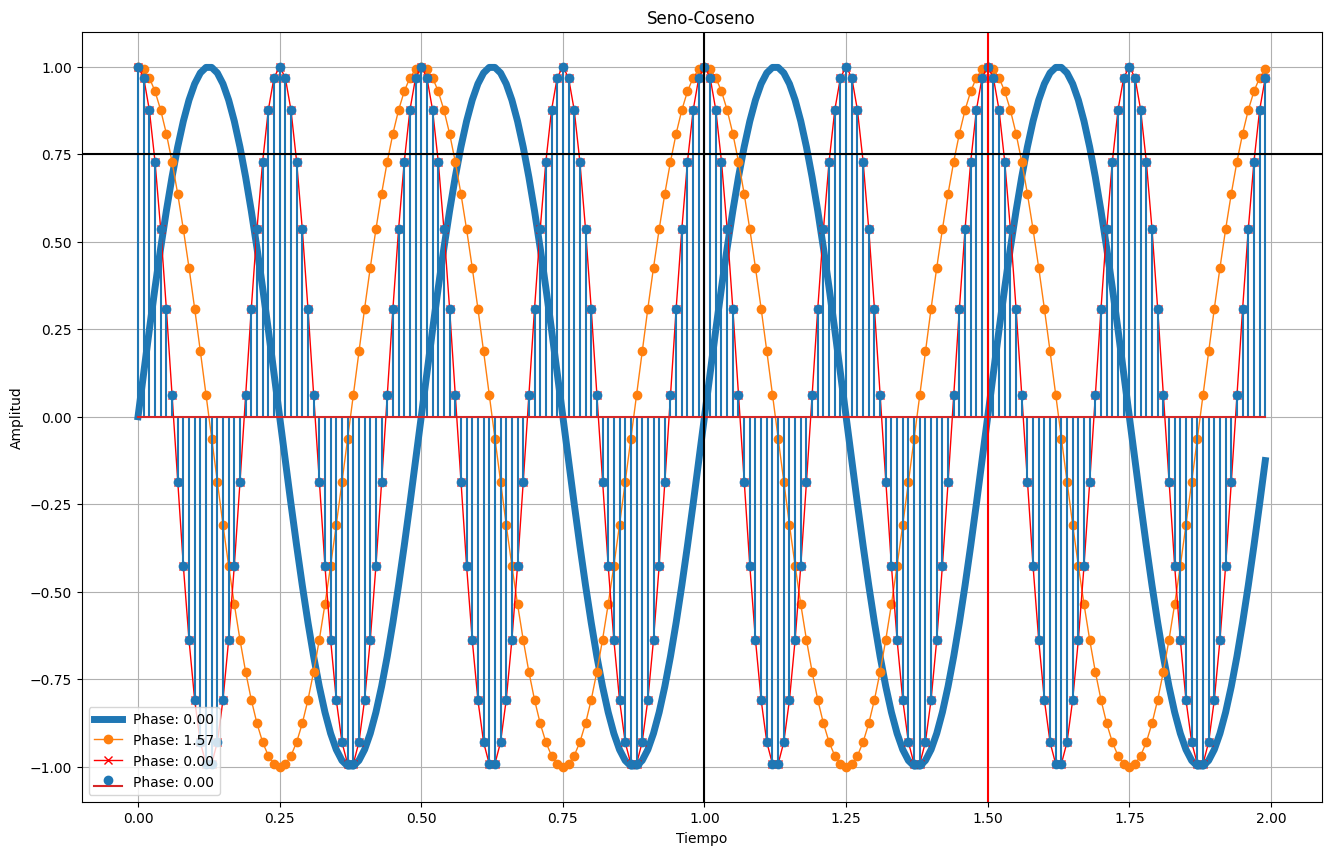

In [3]:
## Graficos usando matplotlib.pyplot
phase0 = 0.
phase1 = np.pi/2.
f0     = 2.
f1     = 2.
f2     = 4.

t  = np.arange(0.,f0,0.01)
y0 = np.sin(2.*np.pi*f0*t + phase0)
y1 = np.sin(2.*np.pi*f1*t + phase1)
y2 = np.cos(2.*np.pi*f2*t + phase0)

pl.figure()
y3 = np.ones((len(t),1))* 0.75
# pl.plot(t,y3)

pl.figure()
pl.plot(t,y0,linewidth=5.0,label='Phase: %1.2f'%phase0)
pl.plot(t,y1,'o-',linewidth=1.0,label='Phase: %1.2f'%phase1)
pl.plot(t,y2,'x-r',linewidth=1.0,label='Phase: %1.2f'%phase0)
pl.stem(t,y2,label='Phase: %1.2f'%phase0)
pl.axvline(x=1,color='k')           #linea vertical
pl.axvline(x=1.5,color='r')     
pl.axhline(y=0.75,color='k')        #linea horizontal
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.title('Seno-Coseno')
pl.legend(loc=0) #'upper left'
pl.grid()
pl.show()

## Histogramas

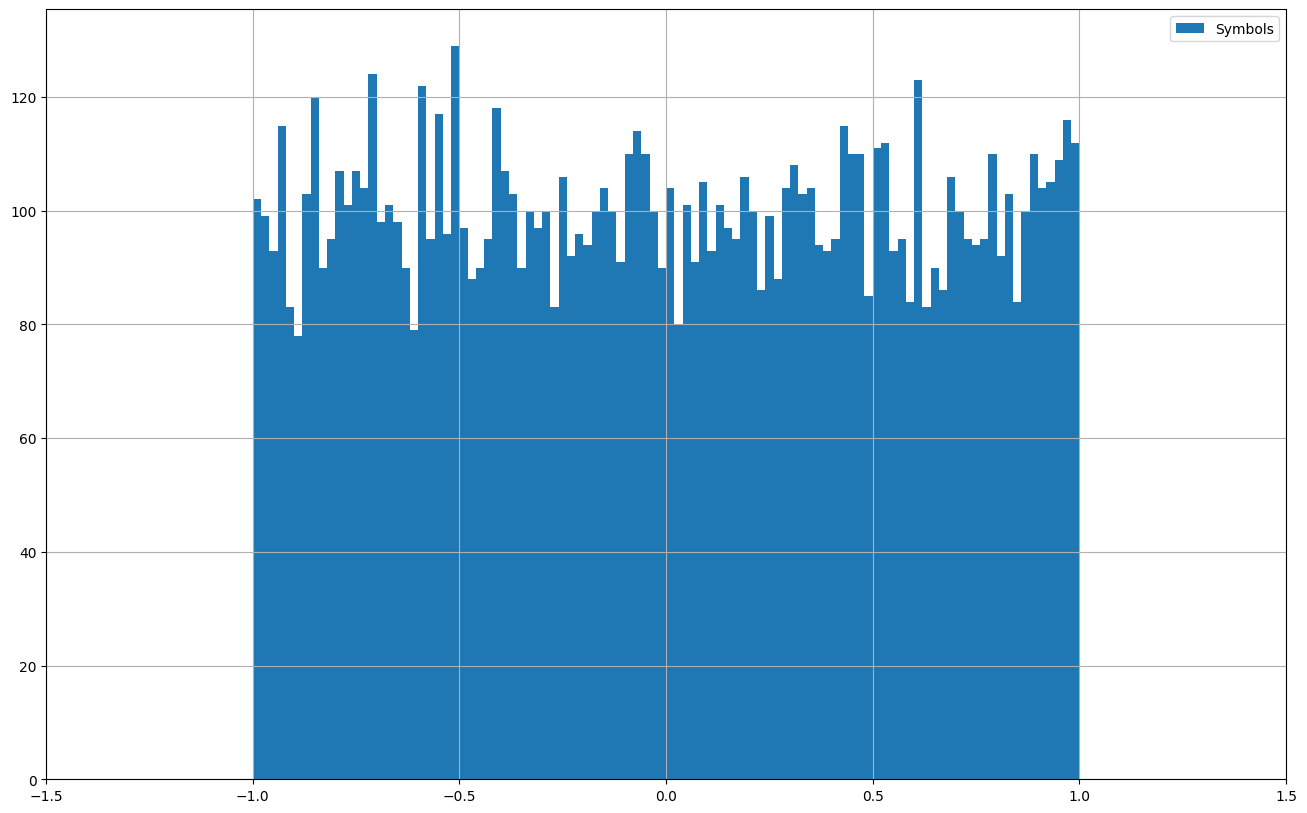

In [4]:
Npts   = 10000
symbols = np.random.uniform(-1,1,Npts)
#symbols = 2*(np.random.uniform(-1,1,Nsymb)>0.0)-1
pl.figure()
pl.hist(symbols,100,label='Symbols')
pl.legend()
pl.xlim(-1.5,1.5)
#pl.ylim(0,10000)
pl.grid()
pl.show()

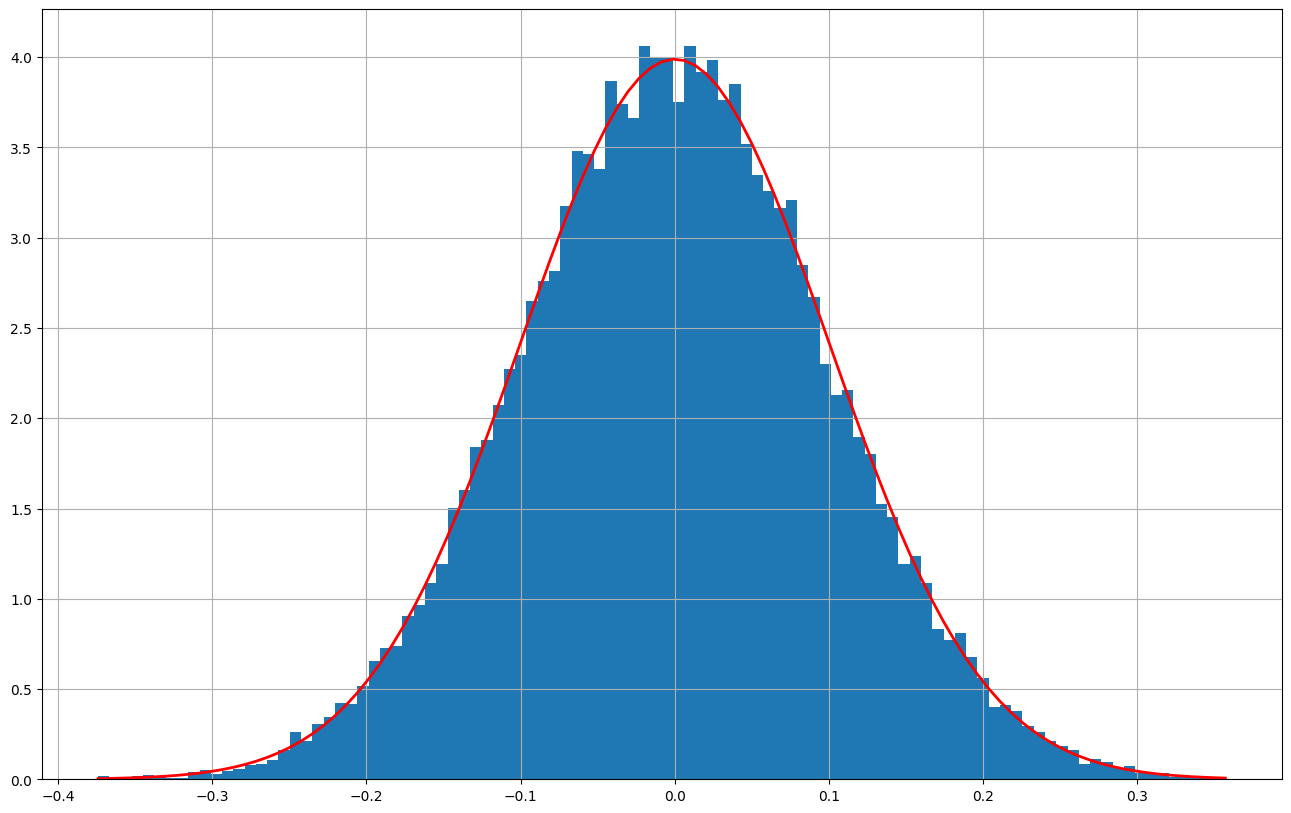

In [5]:
mu, sigma = 0, 0.1
samples   = np.random.normal(mu, sigma, 30000)

pl.figure()
count, bins, ignored = pl.hist(samples, 100, density=True)

pl.plot(bins, 1/(sigma * np.sqrt(2. * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2. * sigma**2) ),
         linewidth=2, color='r')
pl.grid()
pl.show()

## Scatter

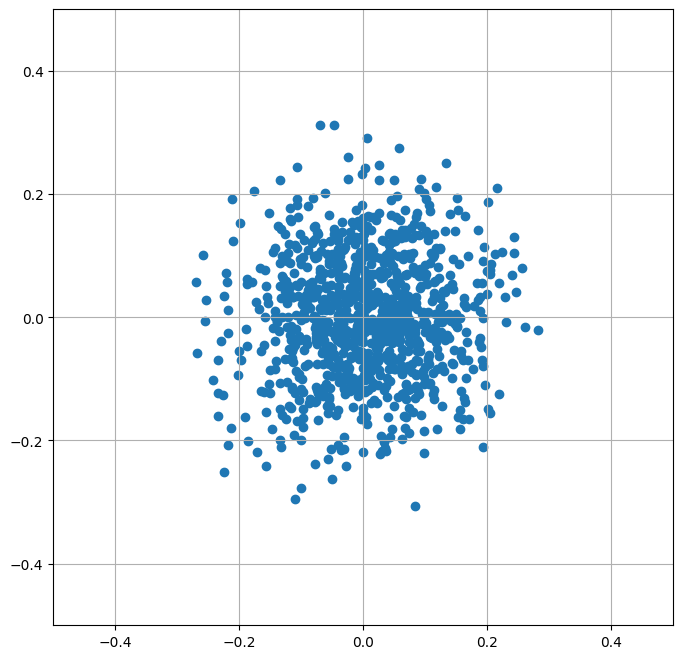

In [6]:
mu, sigma = 0., 0.1
x   = np.random.normal(mu, sigma, 1000)
y   = np.random.normal(mu, sigma, 1000)
pl.figure(figsize=[8,8])
pl.scatter(x,y)
pl.xlim(-0.5,0.5)
pl.ylim(-0.5,0.5)
pl.grid()
pl.show()

## Histograma 2D

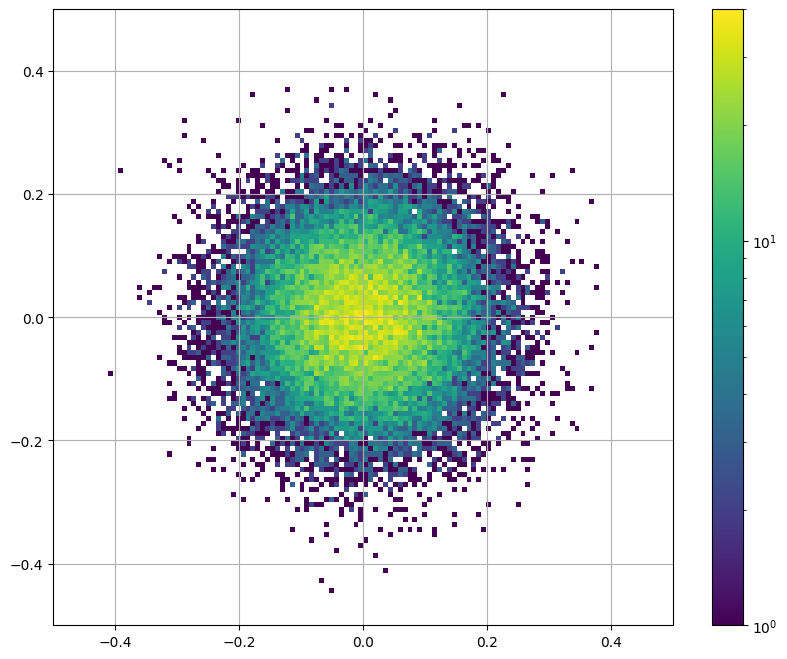

In [7]:
from matplotlib.colors import LogNorm

mu, sigma = 0, 0.1
x   = np.random.normal(mu, sigma, 30000)
y   = np.random.normal(mu, sigma, 30000)

pl.figure(figsize=[10,8])
pl.hist2d(x, y, bins=100, norm=LogNorm())
pl.colorbar()
pl.xlim(-0.5,0.5)
pl.ylim(-0.5,0.5)
pl.grid()
pl.show()

## Multiples Graficos

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


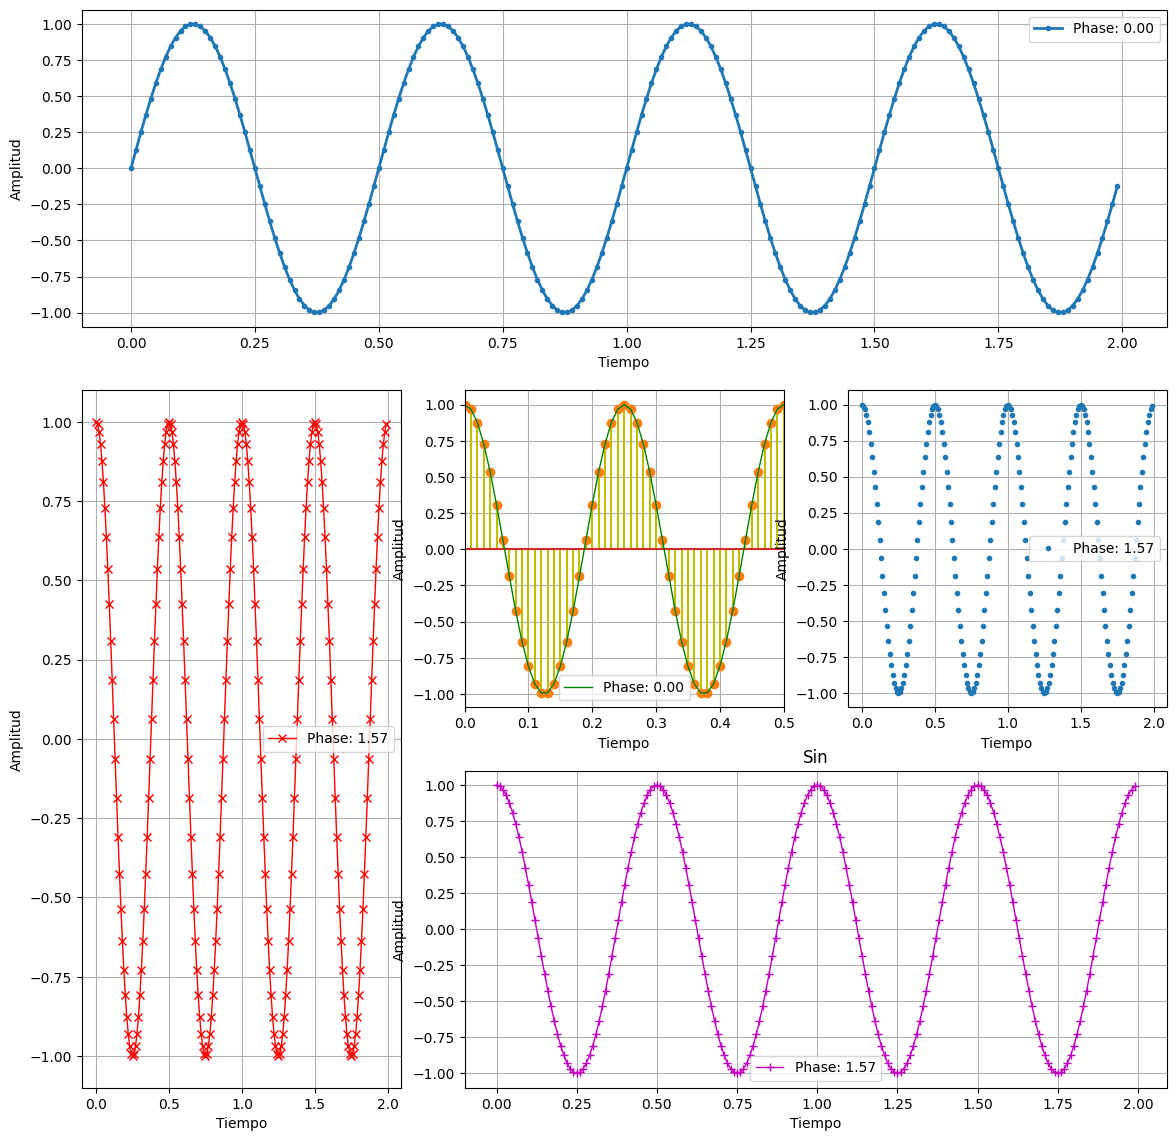

In [8]:
pl.figure(figsize=[14,14])

pl.subplot(3,3,(1,3))
pl.plot(t,y0,'.-',linewidth=2.0,label='Phase: %1.2f'%phase0)
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.legend()
pl.grid()

pl.subplot(3,3,(4,7))
pl.plot(t,y1,'rx-',linewidth=1.0,label='Phase: %1.2f'%phase1)
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.legend()
pl.grid()

pl.subplot(3,3,5)
pl.stem(t,y2,'y',markerfmt='C1o')
pl.plot(t,y2,'g',linewidth=1.0,label='Phase: %1.2f'%phase0)
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.xlim(0,0.5)
pl.legend()
pl.grid()

pl.subplot(3,3,6)
pl.plot(t,y1,'.',linewidth=1.0,label='Phase: %1.2f'%phase1)
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.legend()
pl.grid()

pl.subplot(3,3,(8,9))
pl.plot(t,y1,'m+-',linewidth=1.0,label='Phase: %1.2f'%phase1)
pl.ylabel('Amplitud')
pl.xlabel('Tiempo')
pl.legend()
pl.grid()
pl.title('Sin')

## Guardando figuras en archivos
pl.savefig('grafica.eps')
pl.savefig('grafica.pdf')
pl.savefig('grafica.png')

pl.show()

## Graficando datos desde un archivo

In [9]:
datos = np.fromfile('sine.log',sep=',')
pl.figure(figsize=[10,8])
pl.plot(datos)
pl.grid()
pl.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sine.log'

## Control de graficos (solo en interprete no interactivo)

In [ ]:
pl.show(block=False)
input('Press Enter to Continue')
pl.close()

In [ ]:
def plotfigs(data,figNew=True,show=False):
    if figNew==True:
        pl.figure()

    pl.plot(np.arange(0,len(data)),data,label='color')
    pl.grid(True)

    if show==True:
        pl.show()

plotfigs(y0)
plotfigs(y1,figNew=False)
plotfigs(y2,show=True)

# TP2 Parte 1

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

#define las dimensiones de las figuras por defecto (en pulgadas)
pl.rcParams['figure.figsize']= [8.0,5.0]

def figPlot(x, y, row, col, joinVec, numplot, show, typeGraf="plot", xlim=(0,1), ylim=(0,1), xlabel="Tiempo",
ylabel="Amplitud"):
    #calculo cantidad de plots para iterar sobre ellos
    #configuro cada plot segun parametros
    pl.figure(figsize=[14,14], num = numplot)
    
    Nplots = np.shape(x)[0]     #la cantidad de plots es la cantidad de vectores que se reciben para graficar
    
    for plot in range(Nplots):
        pl.subplot(row,col,joinVec[plot])   
        if(typeGraf[plot] == 'plot'):
            pl.plot(x[plot], y[plot])
        elif(typeGraf[plot] == 'stem'):
            pl.stem(x[plot], y[plot])
        pl.xlim(xlim[plot])
        pl.ylim(ylim[plot])
        pl.xlabel(xlabel)
        pl.ylabel(ylabel)
            
        if(show[plot]):
            pl.show()
    
f0 = 2.
phase0 = 0.
phase1 = np.pi/2.
t  = np.arange(0.,2.*np.pi,0.01)
y0 = np.sin(4.*np.pi*f0*t + phase0)
y1 = np.sin(2.*np.pi*f0*t + phase1)
xlim = [[0,np.pi/6], [0,np.pi/6]]
ylim = [[-3,3], [-2,2]]
numplot = 1
typeGraf = ["plot", "stem"]
xlabel = "Tiempo"
ylabel = "Amplitud"
joinVec = [(1),(2)]
show = [True, True]
figPlot([t, t], [y0, y1], row = 2, col = 1, joinVec=joinVec, numplot=numplot, show=show, xlim=xlim, ylim=ylim, typeGraf=typeGraf, xlabel=xlabel, ylabel=ylabel)

# pl.subplot(3,3,(8,9))
# pl.plot(t,y1,'m+-',linewidth=1.0,label='Phase: %1.2f'%phase1)
# pl.ylabel('Amplitud')
# pl.xlabel('Tiempo')
# pl.legend()
# pl.grid()
# pl.title('Sin')


# Falta  
- Que avise si no entran mas graficos
- Ver generacion de x e y  


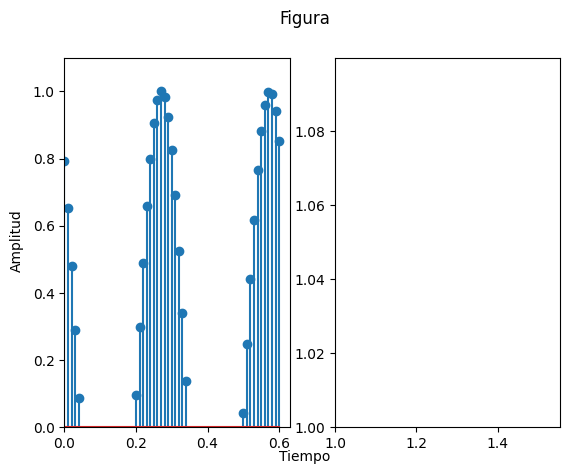

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

def generar_datos(num_graficos):
    datos_x = np.empty(num_graficos, dtype=object) #Crea dos arreglos vacíos datos_x y datos_y con una longitud de num_graficos. 
    datos_y = np.empty(num_graficos, dtype=object) #que pueden contener cualquier tipo de objeto Python en cada una de sus posiciones.

    for i in range(num_graficos):
        # Generar datos aleatorios para cada gráfico
        # Aquí se puede aplicar algún criterio específico según tus necesidades
        f0 = np.random.uniform(1, 5)
        phase0 = np.random.uniform(0, np.pi)
        t = np.arange(0., 2/f0, 0.01)
        y = np.sin(2. * np.pi * f0 * t + phase0)

        datos_x[i] = t #asigna el arreglo t a la posición i del arreglo datos_x. De esta manera, se almacenan 
                       #los valores de tiempo correspondientes al gráfico i en datos_x.
        datos_y[i] = y #asigna el arreglo y a la posición i del arreglo datos_y. De esta manera, se almacenan 
                       #los valores de amplitud correspondientes al gráfico i en datos_y.

    return datos_x, datos_y 

def figPlot(x, y, row, col, joinVec, numplot=1, show=False, typeGraf="plot", xlim=(0, 1), ylim=(0, 1), xlabel="Tiempo",
            ylabel="Amplitud"):
    fig = plt.figure(num=numplot)
    Nplots = np.shape(x)[0]

    for i, plot in enumerate(range(Nplots)):
        plt.subplot(row, col, joinVec[i])
        if typeGraf[i] == "plot":
            plt.plot(x[i], y[i])
        else:
            plt.stem(x[i], y[i])
        plt.xlim(xlim[i])
        plt.ylim(ylim[i])
        if show:
            plt.show()
    
    fig.suptitle('Figura')
    fig.text(0.5, 0.04, xlabel, ha='center')
    fig.text(0.04, 0.5, ylabel, va='center', rotation='vertical')


def graficar():
    valid_input = False
    while not valid_input:
        try:
            row = int(input("Ingrese la cantidad de filas de subplots: "))
            col = int(input("Ingrese la cantidad de columnas de subplots: "))
            joinVec = input("Ingrese la distribución de subplots (números separados por espacios): ")
            joinVec = [int(x) for x in joinVec.split()]
            if len(joinVec) != row * col:
                print("La cantidad de subplots no coincide con la distribución especificada. Intente nuevamente.")
            else:
                valid_input = True
        except ValueError:
            print("Entrada inválida. Intente nuevamente.")

    numplot = int(input("Ingrese el número de la figura: "))
    show = input("Mostrar gráfico (s/n): ").lower() == "s"
    typeGraf = input("Ingrese el tipo de gráfico para cada subplot (plot/stem): ").split()
    xlim = []
    ylim = []
    for _ in range(row * col):
        x_min = float(input("Ingrese el valor mínimo del eje x: "))
        x_max = float(input("Ingrese el valor máximo del eje x: "))
        y_min = float(input("Ingrese el valor mínimo del eje y: "))
        y_max = float(input("Ingrese el valor máximo del eje y: "))
        xlim.append([x_min, x_max])
        ylim.append([y_min, y_max])
    xlabel = input("Ingrese la etiqueta del eje x: ")
    ylabel = input("Ingrese la etiqueta del eje y: ")
    
# Llamado de funcion generar_datos
    datos_x, datos_y = generar_datos(row * col) 
    
    # Llamado de funcion figPlot
    figPlot(datos_x, datos_y, row=row, col=col, joinVec=joinVec, numplot=numplot, show=show,
            typeGraf=typeGraf, xlim=xlim, ylim=ylim, xlabel=xlabel, ylabel=ylabel)
    
row = 1; col = 2
datos_x, datos_y = generar_datos(row * col) 
figPlot(datos_x, datos_y, row, col, joinVec=[1,2], numplot=1)
# graficar()

Subgrafico 1:
Agrego subgrafico

joinVec =  [(1, 1)]
Subgrafico 2:
Agrego subgrafico

joinVec =  [(1, 1), (2, 2)]


ValueError: setting an array element with a sequence.

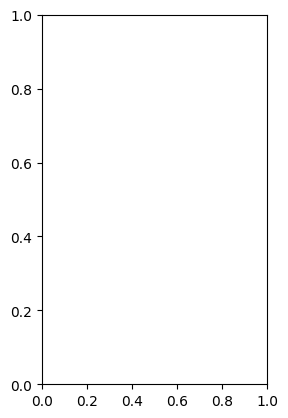

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

#define las dimensiones de las figuras por defecto (en pulgadas)
# pl.rcParams['figure.figsize']= [8.0,5.0]

def figPlot(x, y, row, col, joinVec, numplot=1, show=False, typeGraf="plot", xlim=(0, 1), ylim=(0, 1), xlabel="Tiempo",
            ylabel="Amplitud"):
    fig = pl.figure(num=numplot)
    Nplots = np.shape(x)[0]

    for i, plot in enumerate(range(Nplots)):
        pl.subplot(row, col, joinVec[i])
        if typeGraf[i] == "plot":
            pl.plot(x[i], y[i])
        else:
            pl.stem(x[i], y[i])
        pl.xlim(xlim[i])
        pl.ylim(ylim[i])
    if show:
        pl.show()
    
    fig.suptitle('Figura')
    fig.text(0.5, 0.04, xlabel, ha='center')
    fig.text(0.04, 0.5, ylabel, va='center', rotation='vertical')


def validarSubgrafico(lugares_ocupados, row, col, joinVec):
    #condiciones para agregar un subgrafico:
    cond1 = True   #Que no estén ya ocupados los lugares elegidos 
    cond2 = True   #Que los lugares a ocupar sean todos de la misma fila (solo agrupación horizontal)
    while True:
        opcion = input("  Indices de los bloques que ocupa el subgráfico en la cuadrícula ( , ): ")
        opcion = opcion.split(',')
        if(len(opcion) == 1):   #si se ingresa la ubicacion con un solo indice
            ubic_plot = np.arange(int(opcion[0])-1,int(opcion[0]))
        else:                   #se ingresa la ubicacion como una tupla ( , )
            ubic_plot = np.arange( int(opcion[0])-1, int(opcion[1]) )  #vector con la ubicacion del subgrafico en la grilla
        # print(ubic_plot+1)
        
        #Chequear que los lugares a ocupar sean todos de la misma fila
        k = np.arange(1,row+1)
        lim_derecho = col*k-1
        for i in range(len(ubic_plot)):
            #si encuentro un elemento en el borde del grafico y no es el ultimo, me estoy sobrepasando
            if(ubic_plot[i] in lim_derecho and i != len(ubic_plot)-1 ):   
                print("  El grafico se excede en espacio")
                cond2 = False
                
        #chequear que no estén ocupados todos los lugares
        if(True in lugares_ocupados[ubic_plot[0] : ubic_plot[-1]+1]):   #no hay ningun lugar ocupado en los elegidos
            print("  Uno de los lugares está ocupado")
            cond1 = False
        # print(cond1, " ", cond2)
        if(cond1 and cond2):
            print("Agrego subgrafico\n")    
            lugares_ocupados[ubic_plot[0] : ubic_plot[-1] + 1] = True
            joinVec.append( (ubic_plot[0] + 1 , ubic_plot[-1] + 1) )
            break       
        cond1 = cond2 = True
        # print("Error: El espacio seleccionado para este subgráfico no es compatible con la configuración elegida")
    return joinVec

def generar_datos(num_graficos):
    datos_x = np.empty(num_graficos, dtype=object) #Crea dos arreglos vacíos datos_x y datos_y con una longitud de num_graficos. 
    datos_y = np.empty(num_graficos, dtype=object) #que pueden contener cualquier tipo de objeto Python en cada una de sus posiciones.

    for i in range(num_graficos):
        # Generar datos aleatorios para cada gráfico
        # Aquí se puede aplicar algún criterio específico según tus necesidades
        f0 = np.random.uniform(1, 10)
        phase0 = np.random.uniform(0, np.pi)
        t = np.arange(0., f0, 0.01)
        y = np.sin(2. * np.pi * f0 * t + phase0)

        datos_x[i] = t #asigna el arreglo t a la posición i del arreglo datos_x. De esta manera, se almacenan 
                       #los valores de tiempo correspondientes al gráfico i en datos_x.
        datos_y[i] = y #asigna el arreglo y a la posición i del arreglo datos_y. De esta manera, se almacenan 
                       #los valores de amplitud correspondientes al gráfico i en datos_y.

    return datos_x, datos_y 

def graficar():
    # y[plot, x]
    Npts = 1000    #cantidad de puntos por grafico
    y = []  #lista de vectores
    x = []
    ylim = []
    xlim = []
    xlabel = []
    ylabel = []
    typeGraf = []
    joinVec = []
    
    # numplot = int(input("Número de figura: "))
    numplot = 1
    opcion = input("Cantidad de filas y columnas para distribuir los gráficos (fila, col): ")
    opcion = opcion.split(',')
    row, col = int(opcion[0]), int(opcion[1])
    lugares_ocupados = np.full(row*col, False)   #True = lugar ocupado, False = lugar libre
    plot = 0

    while False in lugares_ocupados[:]:     #seguir agregando subgraficos mientras haya lugar
        print("Subgrafico %d:"%(plot+1))
        #validación de coherencia entre cantidad de subplots y su distribucion
        validarSubgrafico(lugares_ocupados, row, col, joinVec)
        print("joinVec = ", joinVec)

        
        dist = input("  Distribución de datos [Normal o Uniforme]: ")
        #ajustar amplitud vertical segun los limites y
        if(dist.lower() == "normal" or dist.lower() == "n"):    #Ingresar mu y sigma
            mu, sigma = 0, 0.1
            y.append(np.random.normal(mu, sigma, Npts))
        if(dist.lower() == "uniforme" or dist.lower() == "u"):  
            y.append(np.random.uniform(0,1,Npts))
        if(dist.lower() == "d"):  
            datos_x, datos_y = generar_datos(1)
            y.append(datos_y)
            # y.append(np.random.uniform(0,1,Npts))
            xlabel.append("Tiempo")
            xlim.append([0,5])
            rango = abs(xlim[plot][1]-xlim[plot][0])
            x.append(datos_x)
            # x.append( np.arange(xlim[plot][0], xlim[plot][1], rango/1000) )
            ylabel.append("Amplitud")
            ylim.append([-0.5,1.5])
            typeGraf.append("plot")
            # continue
        else:
            
            xlabel.append(input("  Etiqueta para el eje X: "))
            lim = input("    Límites eje X (inferior, superior): ")
            lim = lim.split(',')
            xlim.append( [int(lim[0]), int(lim[1])] )
            # print(xlim)
            rango = abs(xlim[plot][1]-xlim[plot][0])
            x.append( np.arange(xlim[plot][0], xlim[plot][1], rango/1000) )   #asigno 1000 puntos a la función entre los limites inferior y superior
            
            ylabel.append( input("  Etiqueta para el eje Y: ") )
            lim = input("    Límites eje Y (inferior, superior): ")
            lim = lim.split(',')
            ylim.append( [int(lim[0]), int(lim[1])] )
            
            opcion = input("Tipo de gráfico [Plot/Stem]: ")
            if(opcion.lower() == "plot" or opcion.lower() == "p"): 
                typeGraf.append("plot")
            elif(opcion.lower() == "stem" or opcion.lower() == "s"): 
                typeGraf.append("stem")
                
        plot += 1   
        opcion = input("Desea agregar otro grafico? [s/n] ")
        if(opcion.lower() == "n"):
            break
         
    opcion = input("Mostrar gráficos? [s/n]: ")
    if(opcion.lower() == "s"):
        show = True
        
    figPlot(x, y, row=row, col=col, joinVec=joinVec, numplot=numplot, show=show, xlim=xlim, ylim=ylim, typeGraf=typeGraf, xlabel=xlabel, ylabel=ylabel)

graficar()



(-5.0, 5.0)

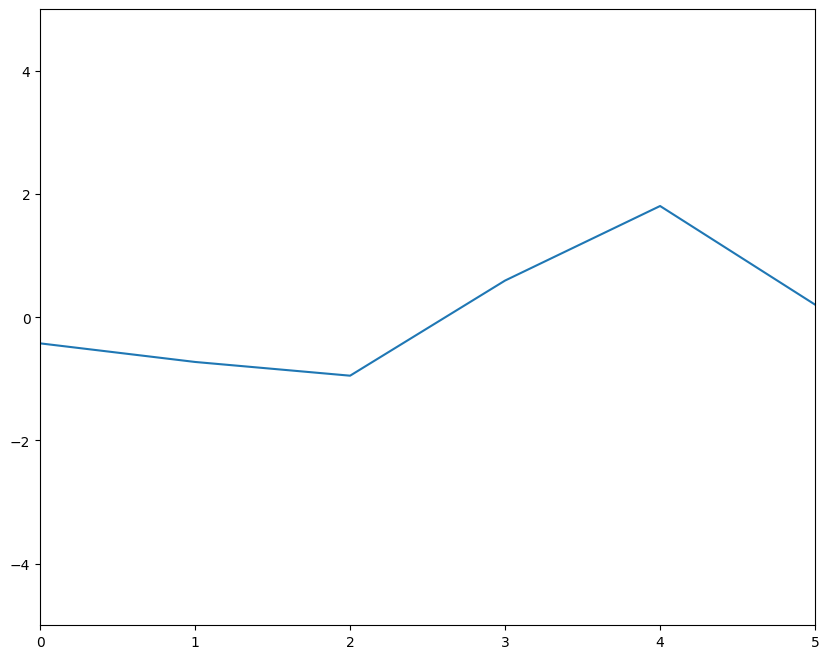

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

Npts   = 10000
mu, sigma = 0, 1
y = np.random.normal(mu, sigma, Npts)
x = np.arange(0,Npts)
pl.figure(figsize=[10,8])
pl.plot(x, y)
# pl.hist2d(x, y, bins=100, norm=LogNorm())
# pl.colorbar()
pl.xlim(0,5)
pl.ylim(-5,5)


In [ ]:
import numpy as np
import matplotlib.pyplot as pl

mu, sigma = int(input("    Valores de (mu, sigma) = ")).split(',')

ValueError: invalid literal for int() with base 10: '1, 0.1'